I will create a linear regression model that predicts the outcome for a tennis player based on their playing habits. By analyzing and modeling the Association of Tennis Professionals (ATP) data, I will determine what it takes to be one of the best tennis players in the world.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

players = pd.read_csv('tennis_stats.csv')
players.head()

,Player,Year,FirstServe,FirstServePointsWon,FirstServeReturnPointsWon,SecondServePointsWon,SecondServeReturnPointsWon,Aces,BreakPointsConverted,BreakPointsFaced,...,ReturnGamesWon,ReturnPointsWon,ServiceGamesPlayed,ServiceGamesWon,TotalPointsWon,TotalServicePointsWon,Wins,Losses,Winnings,Ranking
0,Pedro Sousa,2016,0.88,0.50,0.38,0.50,0.39,0,0.14,7,...,0.11,0.38,8,0.50,0.43,0.50,1,2,39820,119
1,Roman Safiullin,2017,0.84,0.62,0.26,0.33,0.07,7,0.00,7,...,0.00,0.20,9,0.67,0.41,0.57,0,1,17334,381
2,Pedro Sousa,2017,0.83,0.60,0.28,0.53,0.44,2,0.38,10,...,0.16,0.34,17,0.65,0.45,0.59,4,1,109827,119
3,Rogerio Dutra Silva,2010,0.83,0.64,0.34,0.59,0.33,2,0.33,5,...,0.14,0.34,15,0.80,0.49,0.63,0,0,9761,125
4,Daniel Gimeno-Traver,2017,0.81,0.54,0.00,0.33,0.33,1,0.00,2,...,0.00,0.20,2,0.50,0.35,0.50,0,1,32879,272


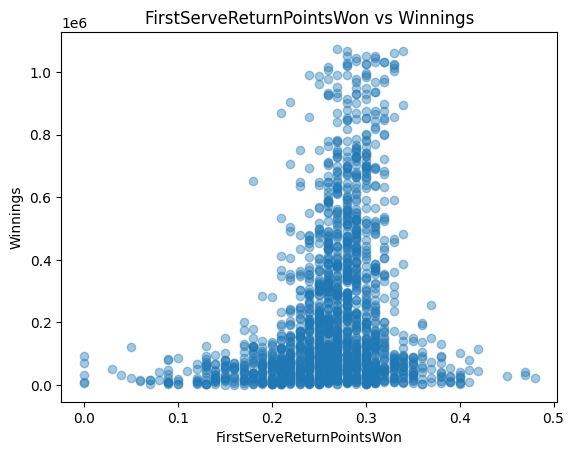

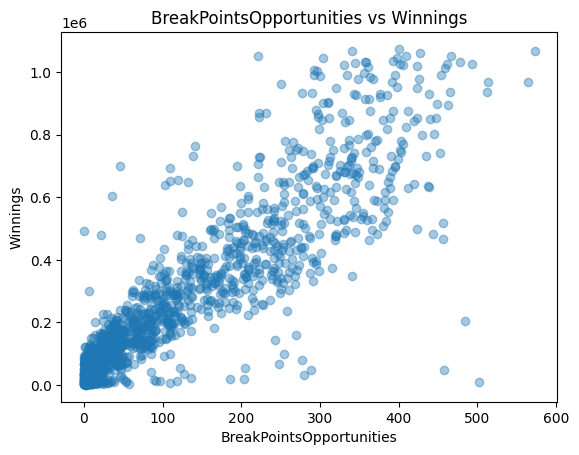

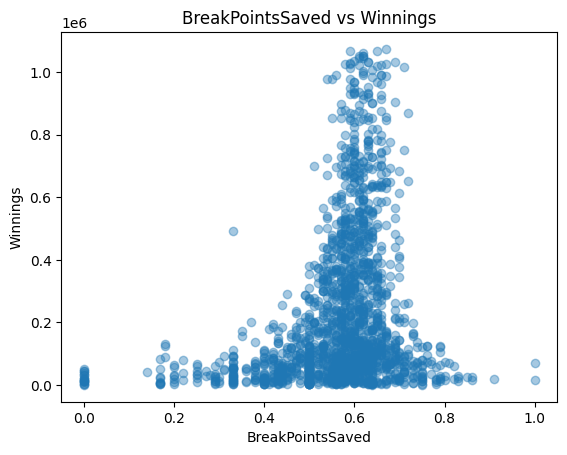

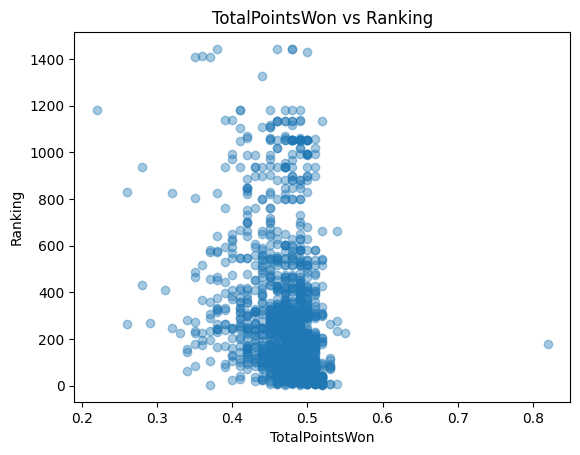

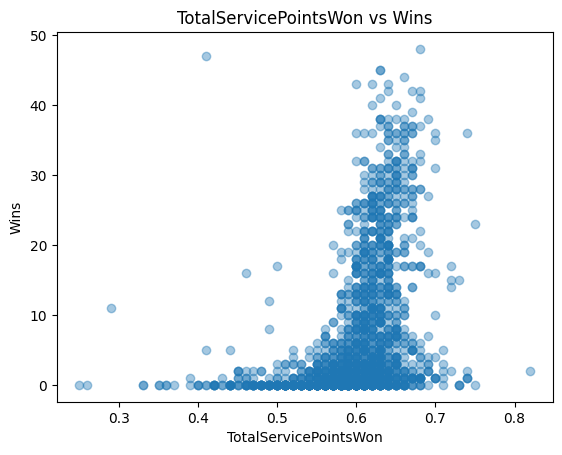

<Figure size 640x480 with 0 Axes>

In [2]:
# exploratory analysis
plt.scatter(players['FirstServeReturnPointsWon'],players['Winnings'], alpha = 0.4)
plt.title('FirstServeReturnPointsWon vs Winnings')
plt.xlabel('FirstServeReturnPointsWon')
plt.ylabel('Winnings')
plt.show()
plt.clf()

plt.scatter(players['BreakPointsOpportunities'],players['Winnings'], alpha = 0.4)
plt.title('BreakPointsOpportunities vs Winnings')
plt.xlabel('BreakPointsOpportunities')
plt.ylabel('Winnings')
plt.show()
plt.clf()

plt.scatter(players['BreakPointsSaved'],players['Winnings'], alpha = 0.4)
plt.title('BreakPointsSaved vs Winnings')
plt.xlabel('BreakPointsSaved')
plt.ylabel('Winnings')
plt.show()
plt.clf()

plt.scatter(players['TotalPointsWon'],players['Ranking'], alpha = 0.4)
plt.title('TotalPointsWon vs Ranking')
plt.xlabel('TotalPointsWon')
plt.ylabel('Ranking')
plt.show()
plt.clf()

plt.scatter(players['TotalServicePointsWon'],players['Wins'], alpha = 0.4)
plt.title('TotalServicePointsWon vs Wins')
plt.xlabel('TotalServicePointsWon')
plt.ylabel('Wins')
plt.show()
plt.clf()

Predicting Winnings with Aces Test Score: 0.5493353183633938


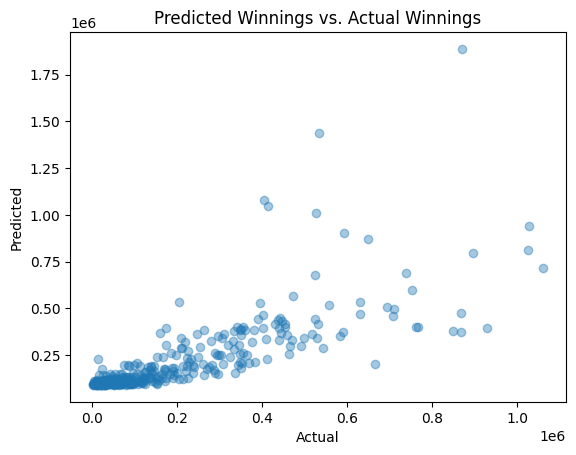

<Figure size 640x480 with 0 Axes>

In [3]:
features = players[['Aces']]
winnings = players[['Winnings']]

# train, test, split the data
features_train, features_test, winnings_train, winnings_test = train_test_split(features, winnings, train_size = 0.8)

# create and train model on training data
model = LinearRegression()
model.fit(features_train,winnings_train)

# score model on test data
print('Predicting Winnings with Aces Test Score:', model.score(features_test, winnings_test))

# make predictions with model
winnings_prediction = model.predict(features_test)

# plot predictions against actual winnings
plt.scatter(winnings_test,winnings_prediction, alpha=0.4)
plt.title('Predicted Winnings vs. Actual Winnings')
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.show()
plt.clf()

Predicting Winnings with BreakPointsOpportunities Test Score: 0.8410577498293388


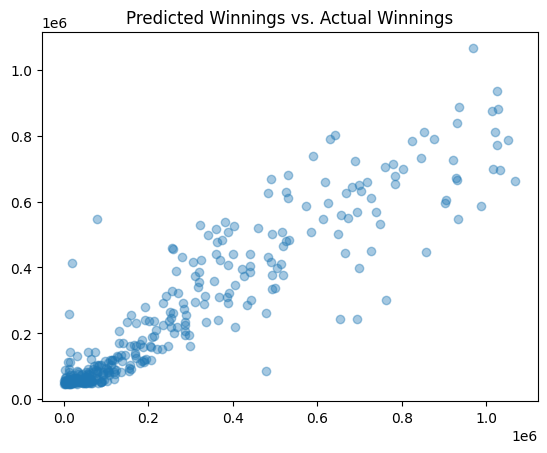

<Figure size 640x480 with 0 Axes>

In [4]:
##single feature linear regression (BreakPointsOpportunities)
features = players[['BreakPointsOpportunities']]
winnings = players[['Winnings']]

features_train, features_test, winnings_train, winnings_test = train_test_split(features, winnings, train_size = 0.8, test_size = 0.2)

model = LinearRegression()
model.fit(features_train, winnings_train)

print('Predicting Winnings with BreakPointsOpportunities Test Score:', model.score(features_test, winnings_test))

winning_prediction = model.predict(features_test)
plt.scatter(winnings_test, winning_prediction, alpha = 0.4)
plt.title('Predicted Winnings vs. Actual Winnings')
plt.show()
plt.clf()

Predicting Winnings with 2 Features Test Score: 0.8031411164407561


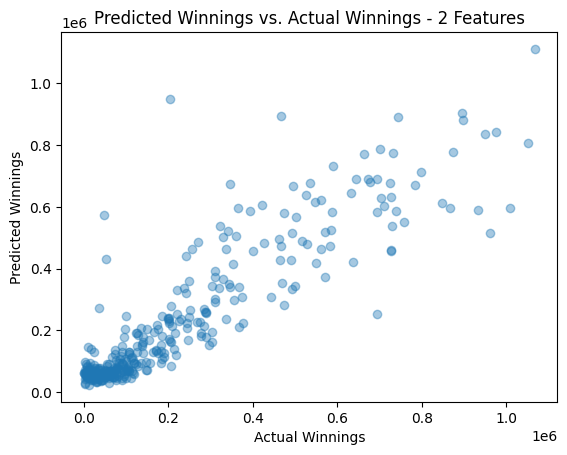

<Figure size 640x480 with 0 Axes>

In [5]:
## two feature linear regression

# select features and value to predict
features = players[['BreakPointsOpportunities','FirstServeReturnPointsWon']]
winnings = players[['Winnings']]

# train, test, split the data
features_train, features_test, winnings_train, winnings_test = train_test_split(features, winnings, train_size = 0.8)

# create and train model on training data
model = LinearRegression()
model.fit(features_train,winnings_train)

# score model on test data
print('Predicting Winnings with 2 Features Test Score:', model.score(features_test,winnings_test))

# make predictions with model
winnings_prediction = model.predict(features_test)

# plot predictions against actual winnings
plt.scatter(winnings_test,winnings_prediction, alpha=0.4)
plt.title('Predicted Winnings vs. Actual Winnings - 2 Features')
plt.xlabel('Actual Winnings')
plt.ylabel('Predicted Winnings')
plt.show()
plt.clf()

Predicting Winnings with Multiple Features Test Score: 0.8273420575254745


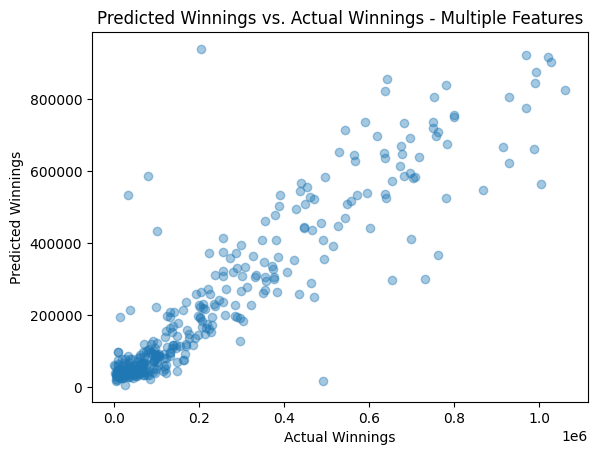

<Figure size 640x480 with 0 Axes>

In [6]:
## multiple features linear regression

# select features and value to predict
features = players[['FirstServe','FirstServePointsWon','FirstServeReturnPointsWon',
                    'SecondServePointsWon','SecondServeReturnPointsWon','Aces',
                    'BreakPointsConverted','BreakPointsFaced','BreakPointsOpportunities',
                    'BreakPointsSaved','DoubleFaults','ReturnGamesPlayed','ReturnGamesWon',
                    'ReturnPointsWon','ServiceGamesPlayed','ServiceGamesWon','TotalPointsWon',
                    'TotalServicePointsWon']]
winnings = players[['Winnings']]

# train, test, split the data
features_train, features_test, winnings_train, winnings_test = train_test_split(features, winnings, train_size = 0.8)

# create and train model on training data
model = LinearRegression()
model.fit(features_train,winnings_train)

# score model on test data
print('Predicting Winnings with Multiple Features Test Score:', model.score(features_test,winnings_test))

# make predictions with model
winnings_prediction = model.predict(features_test)

# plot predictions against actual winnings
plt.scatter(winnings_test,winnings_prediction, alpha=0.4)
plt.title('Predicted Winnings vs. Actual Winnings - Multiple Features')
plt.xlabel('Actual Winnings')
plt.ylabel('Predicted Winnings')
plt.show()
plt.clf()